<a href="https://colab.research.google.com/github/rafaellagp/Alura/blob/main/Real_estate_price_prediction_ALURA_workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data analysis and real estate price prediction in São Paulo**
Imerssão de dados 4 - Alura

by: Rafaella Porto 


github.com/rafaellagp | 
linkedin.com/in/rafaella-porto



# 1 Introduction

The following project is the result of the fourth edition of the Alura Data Immersion from the 23rd to the 27th of May 2022. Alura promoted an event focused on Data Science, Data Immersion 4, with 5 classes, each with several challenges. The data science workshop by Alura aimed to present Python commands and its main data analysis libraries, as well as a last class on Machine Learning. 

Two databases were used in the construction of the analyzed database: São Paulo real estate market and socioeconomic data from IBGE.

The project aim to predict the sale price of properties in São Paulo.

# 2 Exploratory Data Analysis

Use statistical and visualization techniques to better understand data and generate insights, formulate hypotheses, and seek answers to data-driven questions.

# 2.1 Import Libraries

The main Python language libraries used in this project were:
Numpy, for manipulating arrays and their numerical calculations, when necessary;
Pandas, used to manipulate databases, this library is almost the soul of data analysis in Python;
Matplotlib and Seaborn, for creating static plots;
Geopandas for georeferencing
Scikit-Learn, for Machine Learning models.

In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
!pip install geopandas
import geopandas as gpd
!pip install regressors
from regressors import stats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for regressors: filename=regressors-0.0.3-py2.py3-none-any.whl size=12401 sha256=a3f842043174c6ecc00df761b19205ef1dbbffe4dcab956abc3204b51b615f04
  Stored in directory: /root/.cache/pip/wheels/5e/84/7d/c7f674a24c508709cdd3aa6cf0f129899f21061b2821ceed32
Successfully built regressors


# 2.2 Import Data

In [ ]:
df = pd.read_csv("https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv") 
#database of Real Estate in São Paulo

df_ibge = pd.read_csv("https://gist.githubusercontent.com/tgcsantos/85f8c7b0a2edbc3e27fcad619b37d886/raw/a4954781e6bca9cb804062a3eea0b3b84679daf4/Basico_SP1.csv",sep = ";" )
#database of socioeconomic variables. Source:IBGE



# 2.3 Data Wrangling: Real Estate Dataset

In [ ]:
df.sample(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
8444,"Rua Doutor Abelardo Vergueiro César, 432",Vila Alexandria,São Paulo,90,4,4,2,R$ 630.000
6006,NaN,Jardim Europa,São Paulo,172,2,3,2,R$ 4.400.000
4312,Rua Pedra Azul,Aclimação,São Paulo,200,3,1,4,R$ 4.000.000
428,Rua das Fiandeiras,Vila Olímpia,São Paulo,300,4,1,2,R$ 3.900.000
6339,Rua Matias Roxo,Vila Leopoldina,São Paulo,100,2,2,3,R$ 650.000
2530,Rua Tefé,Sumaré,São Paulo,452,3,4,2,R$ 2.300.000
2239,NaN,Jardim das Bandeiras,São Paulo,425,4,4,6,R$ 3.800.000
1615,Rua Arandu,Brooklin Paulista,São Paulo,110,3,3,1,R$ 1.265.000
840,Rua Ceará,Consolação,São Paulo,420,4,7,5,R$ 20.000\n /Mês
1833,NaN,Alto de Pinheiros,São Paulo,350,3,5,4,R$ 3.500.000


In [ ]:
df.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


In [ ]:
df["Valor"].str.split(expand = True)

,0,1,2
0,R$,7.000.000,None
1,R$,3.700.000,None
2,R$,380.000,None
3,R$,685.000,None
4,R$,540.000,None
...,...,...,...
10003,R$,665.000,None
10004,R$,2.300.000,None
10005,R$,1.050.000,None
10006,R$,2.200,/Mês


In [ ]:
df["Tipo de Anúncio"] = df["Valor"].str.split(expand = True)[2]
df["Valor"] = df["Valor"].str.split(expand = True)[1]
df["Valor"]

0        7.000.000
1        3.700.000
2          380.000
3          685.000
4          540.000
           ...    
10003      665.000
10004    2.300.000
10005    1.050.000
10006        2.200
10007      270.000
Name: Valor, Length: 10008, dtype: object

In [ ]:
df["Valor"] = df["Valor"].str.replace('.', '')
df["Valor"] = df["Valor"].astype(float)
df["Tipo de Anúncio"].value_counts()
df_vendas = df[df["Tipo de Anúncio"].isnull()] # Some data are not sales but rentals or have daily values. It is necessary to remove rental data, since the purpose of the analysis is to know the sale value of the properties.
df_vendas

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Tipo de Anúncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.0,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.0,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.0,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685000.0,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.0,None
...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,1500000.0,None
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,665000.0,None
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,2300000.0,None
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,1050000.0,None


In [ ]:
df_vendas.groupby("Bairro")[["Valor"]].mean().sort_values(by = "Valor",ascending = False).head(6) #Using the group by function to group by neighborhood having the average property value as an indicator.
top_6 = df_vendas.groupby("Bairro")[["Valor"]].mean().sort_values(by = "Valor",ascending = False).head(6)
#Transformation on the Y axis for the value to appear with the letter M, representing millions, a method that I will continue to use in the next graphs, to facilitate understanding. A thousand is represented by the letter K. I used a function from the website "https://stackoverflow.com/questions/53747298/how-to-format-seaborn-matplotlib-axis-tick-labels-from-number-to-thousands-or -mi"

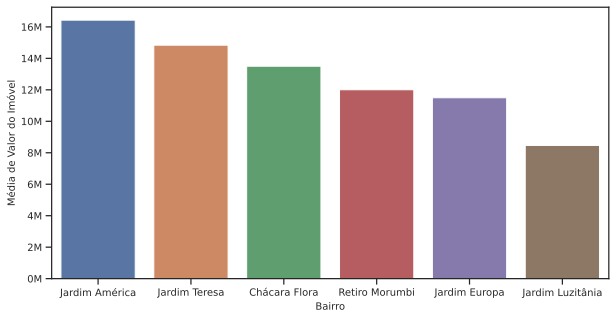

In [ ]:
g = sns.barplot( x = top_6.index, y = top_6["Valor"])
plt.rcParams["figure.figsize"] = (10, 5)
plt.ylabel("Média de Valor do Imóvel",fontsize=10)
plt.xlabel("Bairro",fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ticklabel_format(axis="y", style='plain')


listaxticks = list(plt.yticks()[0])
newList = [x / 1000000 for x in listaxticks]
newList = [int(x) for x in newList]

ylabels = [format(x) + 'M' for x in newList]



g.set_yticklabels(ylabels)

plt.rcParams["figure.figsize"] = (10, 5)

plt.show()

In [ ]:
from scipy import stats
import numpy as np

df_vendas = df_vendas[(np.abs(stats.zscore(df_vendas["Metragem"])) < 3)]
df_vendas = df_vendas[(np.abs(stats.zscore(df_vendas["Valor"])) < 3)]
df_vendas = df_vendas[(np.abs(stats.zscore(df_vendas["Banheiros"])) < 3)]
df_vendas = df_vendas[(np.abs(stats.zscore(df_vendas["Quartos"])) < 3)]
#Remove outliers in the independent variables. Use the Z Score statistic, which sets a level of distance from the mean of the data, and remove from the dataframe the data that is too far from the mean of each column.


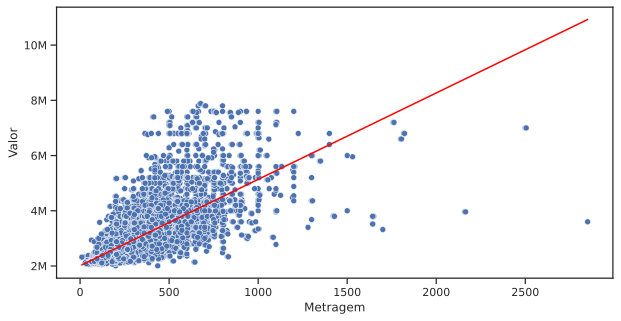

In [ ]:
#As expected, there is a positive correlation between house size ("Metragem") and value ("Valor"), with the red line representing the data regression line.
scatter = sns.scatterplot(x = df_vendas["Metragem"], y = df_vendas["Valor"])
plt.ticklabel_format(axis="y", style='plain')
m, b = np.polyfit(df_vendas["Metragem"], df_vendas["Valor"], 1)
plt.plot(df_vendas["Metragem"], m*df_vendas["Metragem"]+b, color = "red")



listayticks = list(plt.yticks()[0])
newList = [x / 1000000 for x in listaxticks]
newList = [int(x) for x in newList]
ylabels = [format(x) + 'M' for x in newList]
scatter.set_yticklabels(ylabels)


plt.show()

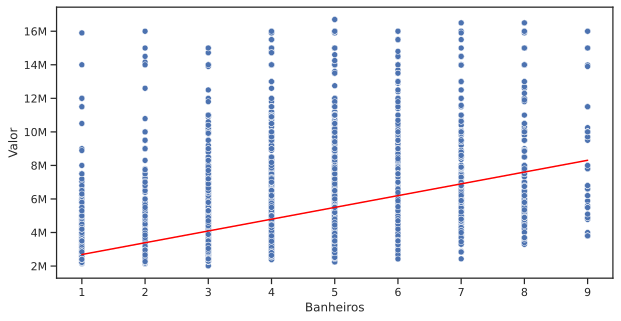

In [ ]:
#As expected, there is also a positive correlation between bathrooms ("Banheiros") and value ("Valor"), with the red line representing the data regression line.

scatter = sns.scatterplot(x = df_vendas["Banheiros"], y = df_vendas["Valor"])

plt.ticklabel_format(axis="y", style='plain')
listayticks = list(plt.yticks()[0])
newList = [x / 1000000 for x in listaxticks]
newList = [int(x) for x in newList]
ylabels = [format(x) + 'M' for x in newList]
scatter.set_yticklabels(ylabels)

m, b = np.polyfit(df_vendas["Banheiros"], df_vendas["Valor"], 1)
plt.plot(df_vendas["Banheiros"], m*df_vendas["Banheiros"]+b, color = "red")

plt.show()

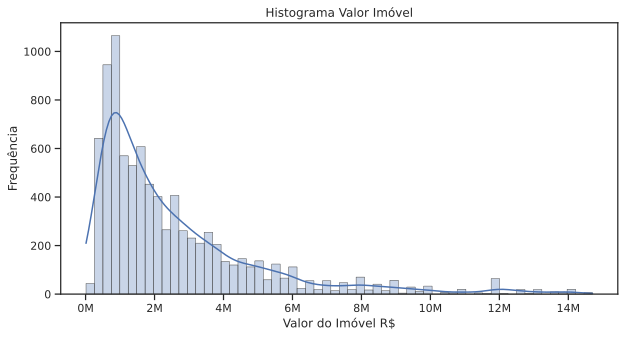

In [ ]:
sns.set_theme(style="ticks")
g = sns.histplot(df_vendas["Valor"],alpha = 0.30, kde = True,  multiple="stack", palette="light:m_r", edgecolor=".3",linewidth=.5)

plt.ticklabel_format(axis="x", style='plain')
listaxticks = list(plt.xticks()[0])
newList = [x / 1000000 for x in listaxticks]
newList = [int(x) for x in newList]
xlabels = [format(x) + 'M' for x in newList]
g.set_xticklabels(xlabels)

plt.ylabel("Frequência", fontsize = 12)
plt.xlabel("Valor do Imóvel R$", fontsize = 12)
plt.rcParams["figure.figsize"] = (10, 5)
plt.title("Histograma Valor Imóvel")


plt.show() #Histogram to show data distribution


In [ ]:
#Another interesting analysis would be the price of the square meter per neighborhood and the plotting of a graph to verify this information.
#First create the column to store the price information per square meter. Group with "groupby" and then the calculations.

df_vendas_group = df_vendas.groupby("Bairro").sum()
df_vendas_group["Preço por M2"] = df_vendas_group["Valor"]/df_vendas_group["Metragem"]
df_vendas_group.reset_index(inplace=True)
top30_bairros = df_vendas_group.sort_values(ascending = False, by = "Preço por M2").head(30)



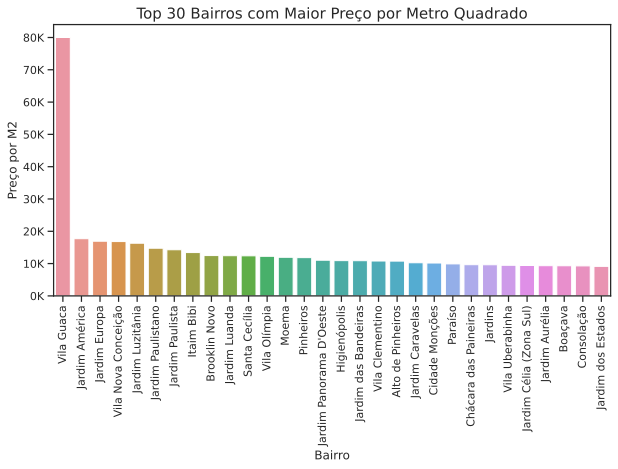

In [ ]:
barchart = sns.barplot(x = top30_bairros["Bairro"], y = top30_bairros["Preço por M2"])

listaxticks = list(plt.yticks()[0])
newList = [x / 1000 for x in listaxticks]
newList = [int(x) for x in newList]

ylabels = [format(x) + 'K' for x in newList]

plt.xticks(rotation = 90)

barchart.set_yticklabels(ylabels)
plt.title("Top 30 Bairros com Maior Preço por Metro Quadrado", fontsize = 15)

plt.show() #Note that the neighborhood with the highest price per square meter is "Vila Guaca", followed by Jardim América.

In [ ]:
#Using the Galeritas gallery, a graphic library made by the Data Science team at Creditas, select a list of the 3 neighborhoods that had the most data in the original dataframe. Thus, a more reliable graph can be plotted, as it is supported by more data.

top4 = df_vendas["Bairro"].value_counts()[:3].index


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


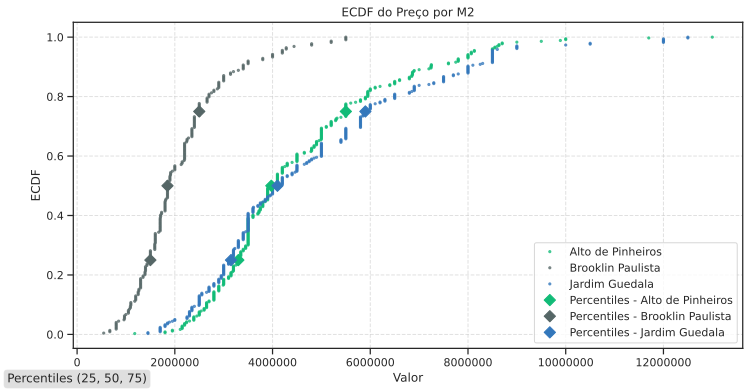

In [ ]:
#Using the Galeritas gallery with the ECDF function. Basically, this type of graph can be interpreted as follows: the value on the Y axis is the percentage of data that meet the information on the X axis. For example, on the Y axis, on the Alto do Pinheiros curve, at point 0.8, there is a corresponding value on the curve around 6 million on the X axis. That is, 80% of the dataframe data for that neighborhood has a value of up to 6 million.

!pip install galeritas
from galeritas import plot_ecdf_curve

ecdf_curv = plot_ecdf_curve( df_vendas.query("Bairro in @top4"), column_to_plot='Valor', figsize=(12, 6), plot_title='ECDF do Preço por M2', hue = "Bairro" )

plt.ticklabel_format(axis="x", style='plain')

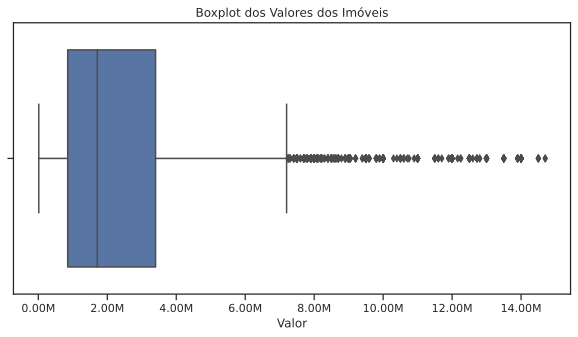

In [ ]:
boxchart = sns.boxplot(x = df_vendas["Valor"])
plt.ticklabel_format(axis="x", style='plain')

xlabels = ['{:,.2f}'.format(x) + 'M' for x in boxchart.get_xticks()/1000000]
boxchart.set_xticklabels(xlabels)
plt.title("Boxplot dos Valores dos Imóveis")
plt.show()

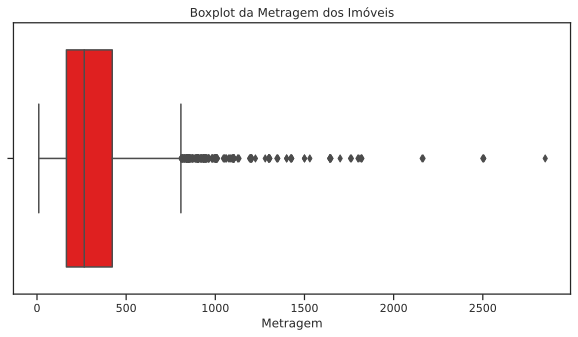

In [ ]:
boxchart = sns.boxplot(x = df_vendas["Metragem"], color = "red")
plt.ticklabel_format(axis="x", style='plain')
plt.title("Boxplot da Metragem dos Imóveis")
plt.show()

# 2.4 Data Wrangling: Socioeconomic Dataset (IBGE)

In [ ]:
df_ibge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18363 entries, 0 to 18362
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cod_setor            18363 non-null  int64  
 1   Cod_Grandes Regi�es  18363 non-null  int64  
 2   Nome_Grande_Regiao   18363 non-null  object 
 3   Cod_UF               18363 non-null  int64  
 4   Nome_da_UF           18363 non-null  object 
 5   Cod_meso             18363 non-null  int64  
 6   Nome_da_meso         18363 non-null  object 
 7   Cod_micro            18363 non-null  int64  
 8   Nome_da_micro        18363 non-null  object 
 9   Cod_RM               18363 non-null  int64  
 10  Nome_da_RM           18363 non-null  object 
 11  Cod_municipio        18363 non-null  int64  
 12  Nome_do_municipio    18363 non-null  object 
 13  Cod_distrito         18363 non-null  int64  
 14  Nome_do_distrito     18363 non-null  object 
 15  Cod_subdistrito      18363 non-null 

In [ ]:
df_ibge[["Nome_do_distrito"]]

,Nome_do_distrito
0,�GUA RASA
1,�GUA RASA
2,�GUA RASA
3,�GUA RASA
4,�GUA RASA
...,...
18358,LAJEADO
18359,LAJEADO
18360,LAJEADO
18361,LAJEADO


In [ ]:
df_ibge = df_ibge.replace({'Nome_do_distrito' : 
                     {'BEL�M' : 'BELÉM',
                      'BRASIL�NDIA' :	'BRASILÂNDIA',
                      'BR�S' : 'BRÁS',
                      'BUTANT�' :	'BUTANTÃ',
                      'CAP�O REDONDO' : 'CAPÃO REDONDO',
                      'CARR�O' : 'CARRÃO',
                      'CONSOLA��O' :	'CONSOLAÇÃO',
                      'FREGUESIA DO �' : 'FREGUESIA DO Ó',
                      'GRAJA�' : 'GRAJAÚ',
                      'JAGUAR�' : 'JAGUARÉ',
                      'JARAGU�' : 'JARAGUÁ',
                      'JARDIM S�O LU�S' : 'JARDIM SÃO LUÍS',
                      'JARDIM �NGELA' : 'JARDIM ÂNGELA',
                      'JA�AN�' : 'JAÇANÃ',
                      'JOS� BONIF�CIO' : 'JOSÉ BONIFÁCIO',
                      'LIM�O' : 'LIMÃO',
                      'REP�BLICA' : 'REPÚBLICA',
                      'SACOM�' : 'SACOMÃ',
                      'SANTA CEC�LIA' : 'SANTA CECÍLIA',
                      'SA�DE' : 'SAÚDE',
                      'S�' : 'SÉ',
                      'S�O DOMINGOS' : 'VILA SÃO DOMINGOS',
                      'S�O LUCAS' : 'SÃO LUCAS',
                      'S�O MATEUS' : 'SÃO MATEUS',
                      'S�O MIGUEL' : 'SÃO MIGUEL',
                      'S�O RAFAEL' : 'SÃO RAFAEL',
                      'TATUAP�' : 'TATUAPÉ',
                      'TREMEMB�' : 'TREMEMBÉ',
                      'VILA CURU��' : 'VILA CURUÇÁ',
                      'VILA JACU�' : 'VILA JACUÍ',
                      'VILA S�NIA' : 'VILA SÔNIA',
                      '�GUA RASA' : 'ÁGUA RASA'}}) #fix bad characters

In [ ]:
df_ibge["Nome_do_distrito"] = df_ibge["Nome_do_distrito"].str.title()
df_vendas["Bairro"] = df_vendas["Bairro"].str.title()

In [ ]:
df_ibge = df_ibge.rename(columns={"Nome_do_distrito": "Bairro"}) 

In [ ]:
df_ibge = df_ibge[["Bairro","V003","V005","V009"]] 
#Now that the column is already treated, you can merge both data. 
#I decided to place the variable V003 (Average number of residents in permanent private households), V005 (Value of the average monthly nominal income of persons responsible for permanent private households (with and without income)) and V009 (Value of the average monthly nominal income of people aged 10 or over (with and without income)) because I believe they can provide important information.


In [ ]:
df_ibge.rename(columns={"V003": "Média do número de moradores","V005":"Renda média mensal","V009":"Renda média mensal +10Anos"}, inplace = True) 



In [ ]:
df_ibge["Média do número de moradores"] = df_ibge["Média do número de moradores"].str.replace(",",".").astype(float)
df_ibge["Renda média mensal"] = df_ibge["Renda média mensal"].str.replace(",",".").astype(float)
df_ibge["Renda média mensal +10Anos"] = df_ibge["Renda média mensal +10Anos"].str.replace(",",".").astype(float)
#replace variables V003, V005 and V009 with more suitable names and convert to numeric.

In [ ]:
df_ibge = df_ibge.groupby("Bairro").mean().reset_index()
#group by Bairro to obtain the average income value for each neighborhood (Bairro) and the average number of residents per household.


In [ ]:
df_ibge.rename(columns={"Média do número de moradores": "Média Moradores do Bairro","Renda média mensal":"Renda Média do Bairro","Renda média mensal +10Anos":"Renda média +10Anos do Bairro"}, inplace = True)
#change the names of the columns to provide better information, as we now have averages based on the neighborhood (Bairro).


In [ ]:
df_vendas_ibge = df_vendas.merge(df_ibge, on='Bairro') #Finaly Merge

In [ ]:
df_vendas_ibge 
#The original dataframe, df_vendas, had 8883 rows. However, as the IBGE data does not cover all neighborhoods, this amount was reduced to 2081. Even so, some graphical analysis can be done before starting to apply machine learning models.


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Tipo de Anúncio,Média Moradores do Bairro,Renda Média do Bairro,Renda média +10Anos do Bairro
0,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.0,None,2.822424,3293.498636,2183.212197
1,Rua Timbó,Mooca,São Paulo,170,3,2,2,940000.0,None,2.822424,3293.498636,2183.212197
2,NaN,Mooca,São Paulo,80,2,2,4,870000.0,None,2.822424,3293.498636,2183.212197
3,Rua Manuel Galvão,Mooca,São Paulo,106,3,3,2,450000.0,None,2.822424,3293.498636,2183.212197
4,"Rua Timbó, 130",Mooca,São Paulo,170,3,1,2,1000000.0,None,2.822424,3293.498636,2183.212197
...,...,...,...,...,...,...,...,...,...,...,...,...
2076,Rua Carlos Gonzalez,Vila Curuçá,São Paulo,121,2,1,2,264214.0,None,3.446557,892.320613,583.245869
2077,"Rua da Cipaúba, 178",Vila São Domingos,São Paulo,140,3,3,2,480000.0,None,3.215041,1592.756179,1065.330732
2078,"Rua da Cipaúba, 178",Vila São Domingos,São Paulo,145,3,3,2,480000.0,None,3.215041,1592.756179,1065.330732
2079,NaN,Aricanduva,São Paulo,278,3,3,2,480000.0,None,3.245161,1312.305645,883.293952


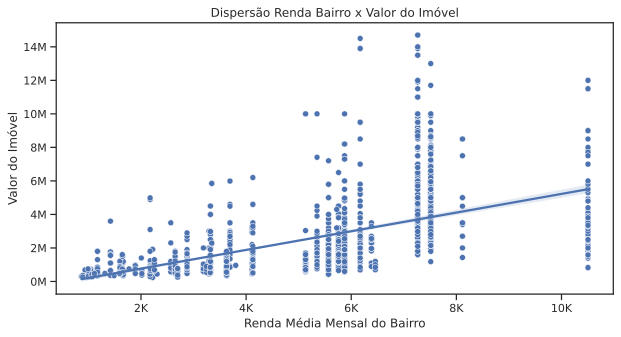

In [ ]:
scatter = sns.scatterplot(x = df_vendas_ibge["Renda Média do Bairro"], y = df_vendas_ibge["Valor"])

sns.regplot( x = df_vendas_ibge["Renda Média do Bairro"], y = df_vendas_ibge["Valor"], scatter=False, ax=scatter)

plt.ticklabel_format(axis="y", style='plain')
listaxticks = list(plt.yticks()[0])
newList = [x / 1000000 for x in listaxticks]
newList = [int(x) for x in newList]

ylabels = [format(x) + 'M' for x in newList]
scatter.set_yticklabels(ylabels)

plt.ticklabel_format(axis="x", style='plain')
listaxticks = list(plt.xticks()[0])
newList = [x / 1000 for x in listaxticks]
newList = [int(x) for x in newList]

xlabels = [format(x) + 'K' for x in newList]
scatter.set_xticklabels(xlabels)

plt.ylabel("Valor do Imóvel", fontsize = 12)
plt.xlabel("Renda Média Mensal do Bairro", fontsize = 12)
plt.title("Dispersão Renda Bairro x Valor do Imóvel")

plt.show() #Apparently, there is a positive relationship between the value of the average neighborhood income and the value of real estate.

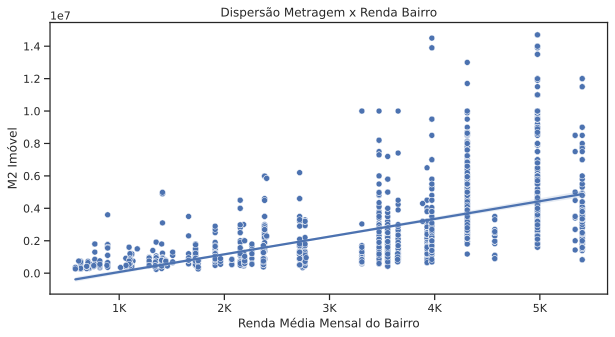

In [ ]:
scatter = sns.scatterplot(x = df_vendas_ibge["Renda média +10Anos do Bairro"], y = df_vendas_ibge["Valor"])

sns.regplot( x = df_vendas_ibge["Renda média +10Anos do Bairro"], y = df_vendas_ibge["Valor"], scatter=False, ax=scatter)



plt.ticklabel_format(axis="x", style='plain')
listaxticks = list(plt.xticks()[0])
newList = [x / 1000 for x in listaxticks]
newList = [int(x) for x in newList]

xlabels = [format(x) + 'K' for x in newList]
scatter.set_xticklabels(xlabels)

plt.ylabel("M2 Imóvel", fontsize = 12)
plt.xlabel("Renda Média Mensal do Bairro", fontsize = 12)
plt.title("Dispersão Metragem x Renda Bairro")


plt.show() #There is also a positive correlation between the average monthly income of people aged 10+ and the value of the property.

The correlation matrix below shows that the relationships made previously, between the average rents and the value of the property, are some of the ones that have the highest correlation in the data given the correlations between the two dataframes. However, there is a very high correlation between two explanatory variables, of 0.96, between the average income value and the average income value +10 years. This can generate a multicollinearity problem, which does not affect the performance of the overall model, but can affect the significance of the t statistics.

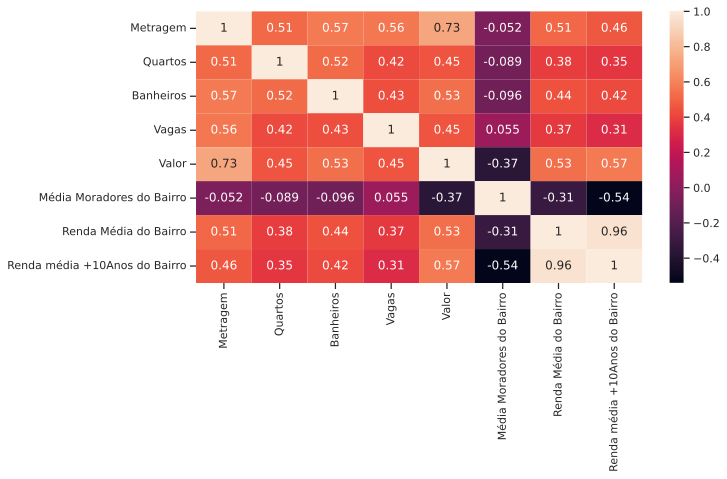

In [ ]:
sns.heatmap(df_vendas_ibge.drop(["Rua","Bairro","Cidade","Tipo de Anúncio"],axis = 1).corr(), annot=True)
plt.show()

# 3 Machine Learning 
Machine Learning is the use of computational algorithms to discover patterns in data and, from there, extract information and results. These techniques are not new, Econometrics, a branch of economics that uses statistics to verify linear or non-linear relationships between variables, has already been around for a few decades, however, machine learning enhances these statistical instruments by facilitating them in a computational way.
The scikit learn library was used, which has several machine learning algorithms and is easy to use.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from regressors import stats

In [ ]:
lr = LinearRegression()
#Linear regression can show the relationship between two or more variables. Here, as the objective of the analysis is to predict the value of the property, linear regression seemed to be a very suitable method.

Before applying the model, it is necessary to separate the dataset into train and test. Thus, the model is trained by one part of the dataset and then tested on the other part. In such a way, the effectiveness of the model can be tested with data that it does not know, which is the purpose of doing this type of analysis.

Placing all numerical variables in the model, we have a reasonable R2, number 0.66. The R2, or R-squared, measures how much the variation of the dependent variable, Y, in this case, the value of the property, is explained by the independent variables. That is, for this model, 66% of the variation is explained by the variables contained in X.

In [ ]:
X = df_vendas_ibge[['Metragem', 'Quartos', 'Banheiros', 'Vagas',"Média Moradores do Bairro","Renda Média do Bairro","Renda média +10Anos do Bairro"]]

Y = df_vendas_ibge["Valor"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30)
lr.fit(X_train, Y_train)


print("coef_pval:\n", stats.coef_pval(lr, X_test, Y_test))

# to print summary table:
print("\n=========== SUMMARY ===========")
xlabels = X_train.columns
stats.summary(lr, X_test, Y_test, xlabels)

coef_pval:
 [4.82242044e-01 0.00000000e+00 8.17832351e-01 9.39149298e-05
 8.99228198e-02 7.17927498e-06 0.00000000e+00 0.00000000e+00]

=========== SUMMARY ===========
Residuals:
          Min           1Q      Median          3Q          Max
-7.477188e+06 -608936.7934 151247.4862 781473.3667 1.046477e+07


Coefficients:
                                   Estimate    Std. Error  t value   p value
_intercept                     1.659755e+06  2.360551e+06   0.7031  0.482242
Metragem                       7.130970e+03  3.253364e+02  21.9188  0.000000
Quartos                        1.815979e+04  7.880792e+04   0.2304  0.817832
Banheiros                      1.710546e+05  4.351004e+04   3.9314  0.000094
Vagas                          6.196070e+04  3.648090e+04   1.6984  0.089923
Média Moradores do Bairro     -1.209671e+06  2.672355e+05  -4.5266  0.000007
Renda Média do Bairro         -5.288264e+02  5.420897e+01  -9.7553  0.000000
Renda média +10Anos do Bairro  1.214811e+03  1.298487e+02   9

When talking about linear regression, there are some tests that we can do to verify the statistical relevance of the model variables, such as the t tests and the f test. The t test verifies whether each independent variable, statistically, is relevant to explain the dependent variable, while the f test verifies whether the entire model, that is, the combination of all independent variables, is relevant to explain the dependent variable.

The p-value tests the null hypothesis based on each variable, which would mean that the independent variable has no statistical relevance for the dependent variable. Assuming 95% significance, we can reject the null hypothesis if the p-value is 0.05, or 5%. Of all the dependent variables, the only one that does not reject the null hypothesis is "Quarters".

The F statistic has a value of 172.56. We can then consult some traditional table, such as the link http://www.socr.ucla.edu/Applets.dir/F_Table.html, with a significance level of 95%. The F statistic has two degrees of freedom, DF1 and DF2, which are the degrees of freedom of the model's numerator and demoninator. DF1 can be calculated with k-1, where K is the number of independent variables, and DF2 with N - K, where N is the sample size. In this model, DF1 is 6, and DF2 is 1456 - 7, which gives 1449. As our F statistic is greater than the critical one of 2.0986, the null hypothesis that none of the variables is statistically relevant to explain the independent variable is rejected.

Machine Learning with the addition of "Metragem"
As we are talking about a city, it turns out that the location, or in which neighborhood the property is located, becomes a relevant factor in dictating the value of the property. One way to put this information would be adding a column referring to the average price per M2 per neighborhood. I reused the variable from the analysis made earlier of the grouped data and made another merge with the dataframe.

In [ ]:
df_vendas_ibge.drop(["Rua","Cidade","Tipo de Anúncio"], axis =1, inplace=True)

df_vendas_group.drop(["Metragem","Quartos","Banheiros","Vagas","Valor"], axis = 1)

,Bairro,Preço por M2
0,Aclimação,7162.688384
1,Alto da Boa Vista,5708.743659
2,Alto da Lapa,6961.299081
3,Alto da Mooca,4385.002777
4,Alto de Pinheiros,10770.210195
...,...,...
688,Vila Água Funda,4283.837057
689,Água Branca,7065.770523
690,Água Fria,5604.534005
691,Água Funda,3920.863309


In [ ]:
df_vendas_ibge = df_vendas_ibge.merge(df_vendas_group.drop(["Metragem","Quartos","Banheiros","Vagas","Valor"], axis = 1), on='Bairro')

In [ ]:
X = df_vendas_ibge[['Metragem','Banheiros',"Quartos", 'Vagas',"Média Moradores do Bairro","Renda Média do Bairro","Renda média +10Anos do Bairro","Preço por M2"]]
Y = df_vendas_ibge["Valor"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30)
lr.fit(X_train, Y_train)


from regressors import stats
print("coef_pval:\n", stats.coef_pval(lr, X_test, Y_test))

# to print summary table:
print("\n=========== SUMMARY ===========")
xlabels = X_train.columns
stats.summary(lr, X_test, Y_test, xlabels)

coef_pval:
 [2.56700304e-02 0.00000000e+00 1.47953467e-02 7.33975059e-01
 2.60531467e-03 3.51201621e-02 1.42858141e-04 1.55502296e-01
 0.00000000e+00]

=========== SUMMARY ===========
Residuals:
          Min           1Q     Median          3Q          Max
-6.733895e+06 -388014.3113 18701.2421 536384.7898 9387975.3365


Coefficients:
                                   Estimate    Std. Error  t value   p value
_intercept                    -3.879266e+06  1.733645e+06  -2.2376  0.025670
Metragem                       6.734532e+03  2.903982e+02  23.1907  0.000000
Banheiros                      9.116044e+04  3.727595e+04   2.4456  0.014795
Quartos                       -2.182293e+04  6.418017e+04  -0.3400  0.733975
Vagas                          8.324903e+04  2.751531e+04   3.0256  0.002605
Média Moradores do Bairro      4.248072e+05  2.010897e+05   2.1125  0.035120
Renda Média do Bairro         -2.659238e+02  6.939925e+01  -3.8318  0.000143
Renda média +10Anos do Bairro  3.397378e+02  2.

The model remains globally significant, however, the variable "Average income +10Years of the Neighborhood", together with "Bedrooms", also has an insignificant T-statistic. It can be said that this is due to its high correlation with the variable "Average Income of the Neighborhood", which is called multicollinearity, when two variables have some high degree of linear correlation. If we want to know what each variable has of relevance to the model, this becomes a problem. However, as the objective here is prediction, leaving both variables in the model is not a relevant problem. With the addition of the "Price per M2" variable, R2, which was previously 66%, has increased to 77%.

**Applying regression on the original sales dataframe.**
Another statistical analysis can be performed on df_vendas, the dataframe without adding IBGE data. We have a considerably lower R2 of 52%. And again, at a 95% significance level, the 'rooms' variable remains insignificant individually for the model. And the F statistic remains globally significant.

In [ ]:
X = df_vendas[['Metragem','Quartos',"Banheiros","Vagas"]]

Y = df_vendas["Valor"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30)
lr.fit(X_train, Y_train)
Y_predict_test = lr.predict(X_test)
Y_predict_train = lr.predict(X_train)
mae_test = mean_absolute_error(Y_test, Y_predict_test)
r2_test = r2_score(Y_test, Y_predict_test)
mae_train = mean_absolute_error(Y_train, Y_predict_train)
r2_train = r2_score(Y_train, Y_predict_train)

print("coef_pval:\n", stats.coef_pval(lr, X_test, Y_test))

# to print summary table:
print("\n=========== SUMMARY ===========")
xlabels = X_train.columns
stats.summary(lr, X_test, Y_test, xlabels)

coef_pval:
 [2.15919584e-05 0.00000000e+00 6.39240836e-01 1.75415238e-14
 2.77383374e-02]

=========== SUMMARY ===========
Residuals:
          Min           1Q      Median          3Q          Max
-1.027368e+07 -342853.6422 228593.1153 774437.1563 1.073410e+07


Coefficients:
                 Estimate     Std. Error  t value   p value
_intercept -526300.877943  123677.446118  -4.2554  0.000022
Metragem      6941.856085      83.381919  83.2537  0.000000
Quartos      15854.141608   33817.504652   0.4688  0.639241
Banheiros   173539.160070   22504.617435   7.7113  0.000000
Vagas        38956.818437   17690.066766   2.2022  0.027738
---
R-squared:  0.53513,    Adjusted R-squared:  0.53442
F-statistic: 758.60 on 4 features


By adding the "Price per M2" variable, the R2 increases considerably, to 73%. And the t-statistic of the variable "Rooms" becomes significant. The model remains globally significant, with the f statistic being greater than the critical f.

In [ ]:
df_vendas2 = df_vendas.merge(df_vendas_group.drop(["Metragem","Quartos","Banheiros","Vagas","Valor"], axis = 1), on='Bairro')


In [ ]:
X = df_vendas2[['Metragem','Quartos',"Banheiros","Vagas","Preço por M2"]]

Y = df_vendas2["Valor"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30)
lr.fit(X_train, Y_train)
Y_predict_test = lr.predict(X_test)
Y_predict_train = lr.predict(X_train)
mae_test = mean_absolute_error(Y_test, Y_predict_test)
r2_test = r2_score(Y_test, Y_predict_test)
mae_train = mean_absolute_error(Y_train, Y_predict_train)
r2_train = r2_score(Y_train, Y_predict_train)

print("coef_pval:\n", stats.coef_pval(lr, X_test, Y_test))

# to print summary table:
print("\n=========== SUMMARY ===========")
xlabels = X_train.columns
stats.summary(lr, X_test, Y_test, xlabels)

coef_pval:
 [0.00000000e+00 0.00000000e+00 4.97603360e-01 6.73500628e-05
 4.69079155e-06 0.00000000e+00]

=========== SUMMARY ===========
Residuals:
          Min          1Q     Median          3Q          Max
-7.143142e+06 -463049.656 40758.6379 619036.4525 2.548563e+07


Coefficients:
                  Estimate     Std. Error  t value   p value
_intercept   -2.444904e+06  121501.959445 -20.1223  0.000000
Metragem      5.833462e+03     120.873086  48.2610  0.000000
Quartos      -2.221529e+04   32747.920085  -0.6784  0.497603
Banheiros     8.229742e+04   20611.750714   3.9927  0.000067
Vagas         7.331845e+04   15976.821651   4.5891  0.000005
Preço por M2  3.553452e+02       3.815995  93.1199  0.000000
---
R-squared:  0.67608,    Adjusted R-squared:  0.67538
F-statistic: 963.45 on 5 features


**Machine Learning with Normalization**
Check the two higher R2 models that I performed and apply a data normalization method, to see if the performance increases, since the dependent variable has a very different scale from the other variables. Thus, the data is transformed on a scale from 0 to 1, where the information is kept.

In [ ]:
from sklearn import preprocessing
import pandas as pd
scaler = preprocessing.MinMaxScaler()
names = df_vendas_ibge[['Metragem','Banheiros',"Quartos", 'Vagas',"Média Moradores do Bairro","Renda Média do Bairro","Renda média +10Anos do Bairro","Preço por M2","Valor"]].columns
d = scaler.fit_transform(df_vendas_ibge[['Metragem','Banheiros',"Quartos", 'Vagas',"Média Moradores do Bairro","Renda Média do Bairro","Renda média +10Anos do Bairro","Preço por M2","Valor"]])
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,Metragem,Banheiros,Quartos,Vagas,Média Moradores do Bairro,Renda Média do Bairro,Renda média +10Anos do Bairro,Preço por M2,Valor
0,0.029605,0.125,0.4,0.04,0.498951,0.251641,0.331973,0.261206,0.021195
1,0.062500,0.125,0.4,0.04,0.498951,0.251641,0.331973,0.261206,0.048845
2,0.020207,0.125,0.2,0.12,0.498951,0.251641,0.331973,0.261206,0.044006
3,0.032425,0.250,0.4,0.04,0.498951,0.251641,0.331973,0.261206,0.014974
4,0.062500,0.000,0.4,0.04,0.498951,0.251641,0.331973,0.261206,0.052993


In [ ]:
X = scaled_df[['Metragem','Banheiros',"Quartos", 'Vagas',"Média Moradores do Bairro","Renda Média do Bairro","Renda média +10Anos do Bairro","Preço por M2"]]

Y = scaled_df["Valor"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30)
lr.fit(X_train, Y_train)
Y_predict_test = lr.predict(X_test)
Y_predict_train = lr.predict(X_train)
mae_test = mean_absolute_error(Y_test, Y_predict_test)
r2_test = r2_score(Y_test, Y_predict_test)
mae_train = mean_absolute_error(Y_train, Y_predict_train)
r2_train = r2_score(Y_train, Y_predict_train)

from regressors import stats
print("coef_pval:\n", stats.coef_pval(lr, X_test, Y_test))

# to print summary table:
print("\n=========== SUMMARY ===========")
xlabels = X_train.columns
stats.summary(lr, X_test, Y_test, xlabels)

coef_pval:
 [9.57729591e-08 0.00000000e+00 1.65799925e-03 5.92337411e-01
 2.98526406e-02 5.10082186e-01 3.88457856e-01 8.04372824e-01
 0.00000000e+00]

=========== SUMMARY ===========
Residuals:
    Min      1Q  Median     3Q    Max
-0.4724 -0.0263  0.0049 0.0415 0.6232


Coefficients:
                               Estimate  Std. Error  t value   p value
_intercept                    -0.137511    0.025411  -5.4115  0.000000
Metragem                       0.961523    0.052571  18.2899  0.000000
Banheiros                      0.073605    0.023277   3.1622  0.001658
Quartos                       -0.013913    0.025967  -0.5358  0.592337
Vagas                          0.129546    0.059477   2.1781  0.029853
Média Moradores do Bairro      0.022115    0.033550   0.6592  0.510082
Renda Média do Bairro         -0.107068    0.124044  -0.8631  0.388458
Renda média +10Anos do Bairro  0.032774    0.132252   0.2478  0.804373
Preço por M2                   0.347497    0.027943  12.4358  0.000000
---

In [ ]:
from sklearn import preprocessing
import pandas as pd
scaler = preprocessing.MinMaxScaler()
names = df_vendas2[['Metragem','Quartos',"Banheiros","Vagas",'Preço por M2',"Valor"]].columns
d = scaler.fit_transform(df_vendas2[['Metragem','Quartos',"Banheiros","Vagas",'Preço por M2',"Valor"]])
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,Metragem,Quartos,Banheiros,Vagas,Preço por M2,Valor
0,0.348592,0.6,0.875,0.20,0.073645,0.475727
1,0.084507,0.4,0.375,0.12,0.073645,0.148226
2,0.061268,0.6,0.250,0.12,0.073645,0.093756
3,0.038380,0.2,0.125,0.04,0.073645,0.044733
4,0.066901,0.6,0.625,0.08,0.073645,0.136243


In [ ]:
X = scaled_df[['Metragem','Quartos',"Banheiros","Vagas","Preço por M2"]]

Y = scaled_df["Valor"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30)
lr.fit(X_train, Y_train)


print("coef_pval:\n", stats.coef_pval(lr, X_test, Y_test))

# to print summary table:
print("\n=========== SUMMARY ===========")
xlabels = X_train.columns
stats.summary(lr, X_test, Y_test, xlabels)

coef_pval:
 [0.00000000e+00 0.00000000e+00 9.21882989e-01 1.24271482e-07
 2.99548889e-06 0.00000000e+00]

=========== SUMMARY ===========
Residuals:
    Min      1Q  Median     3Q    Max
-0.4707 -0.0292  0.0035 0.0416 1.7973


Coefficients:
              Estimate  Std. Error  t value   p value
_intercept   -0.146793    0.003803 -38.5961  0.000000
Metragem      1.101121    0.031751  34.6797  0.000000
Quartos      -0.001112    0.011339  -0.0981  0.921883
Banheiros     0.052000    0.009804   5.3037  0.000000
Vagas         0.114805    0.024517   4.6827  0.000003
Preço por M2  1.986998    0.040730  48.7846  0.000000
---
R-squared:  0.70452,    Adjusted R-squared:  0.70388
F-statistic: 1100.58 on 5 features


R2 after normalizations didn't have big differences from what it was before. The model with IBGE data decreased from 76% to 73%, and that of the sales model without IBGE increased from 73% to 76%.

# 4 Conclusion 
After exploratory analysis and the use of machine learning models, I came to the conclusion that two models were the most effective in predicting the value of the property. First, the model with the variables 'Fitness','Bathrooms',"Rooms", 'Slots',"Average Residents of the Neighborhood","Average Income of the Neighborhood","Average Income +10 Years of the Neighborhood","Price per M2 ", which produced an R2 of 77%. And, second, the model with the normalized data and with the variables 'Size','Rooms',"Bathrooms","Slots","Price per M2", which produced an R2 of 76%. And both make sense with the graphical analyzes performed, which apparently showed linear relationships between the dependent variable, the value of the property, and the other variables.

# 5 References
Statistics F: https://campus.datacamp.com/courses/inferential-statistics/lab-5-quantitative-associations-anova?ex=5#:~:text=The%20F%20distribution%20has%20two,is%20the%20number%20of%20groups.

Statistics T: https://www.investopedia.com/terms/t/t-test.asp#:~:text=Higher%20values%20of%20the%20t,that%20the%20groups%20are%20similar.

libraries: Pandas (https://pandas.pydata.org/) Matplotlib (https://matplotlib.org/) Seaborn (https://seaborn.pydata.org/) Skicit-Learn(https://scikit-learn.org/stable/) Galeritas(https://galeritas.readthedocs.io/en/latest/)